<a href="https://colab.research.google.com/github/unitinguncle/Machine-Learning/blob/main/Train%20Data%20-%20Graphs%20-%20Red%20wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Wine Quality Analysis**

To define the quality of Red Wine, there are a lot of factors. It could be the Alcohol (ABV), Sulphates, pH (a measure of how acidic/basic liquid is), etc. That’s why I used Multiple Linear Regression.
Dataset

The dataset used in this article is based on the ingredients or the composition of mostly Red Wine. This means it has to include:

1. **Fixed Acidity:** Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
2. **Volatile Acidity:** The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. **Citric Acid:** Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
4. **Residual Sugar:** From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
5. **Chlorides:** The amount of salt in the wine
6. **Free Sulfur Dioxide:** It prevents microbial growth and the oxidation of wine
7. **Total Sulfur Dioxide:** The amount of free + bound forms of SO₂
Density: Sweeter wines have a higher density
8. **pH:** Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
9. **Alcohol:** Available in small quantities in wines makes the drinkers sociable
10. **Sulphates:** A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
11. **Quality:** which is the output variable/predictor


**Implement regression analysis on this dataset with suitable data preprocessing and exploratory data analysis.**

In [1]:
# Write Code Here
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data =pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#scatter plot

In [12]:
FEATURES = data.columns[:-1].tolist()
print(len(FEATURES))
LABEL = 'quality'

11


In [13]:
from typing import List

def plotting(df: pd.DataFrame, FEATURES: List[str], LABEL:str) -> None:
  plt.figure(figsize = (20,20))
  for loc,FEATURES in enumerate(FEATURES):
    ax = plt.subplot(4, 4, loc+1)
    sns.scatterplot(x=FEATURES, y=LABEL, data=df)
  plt.show()
  plt.close()
  return None

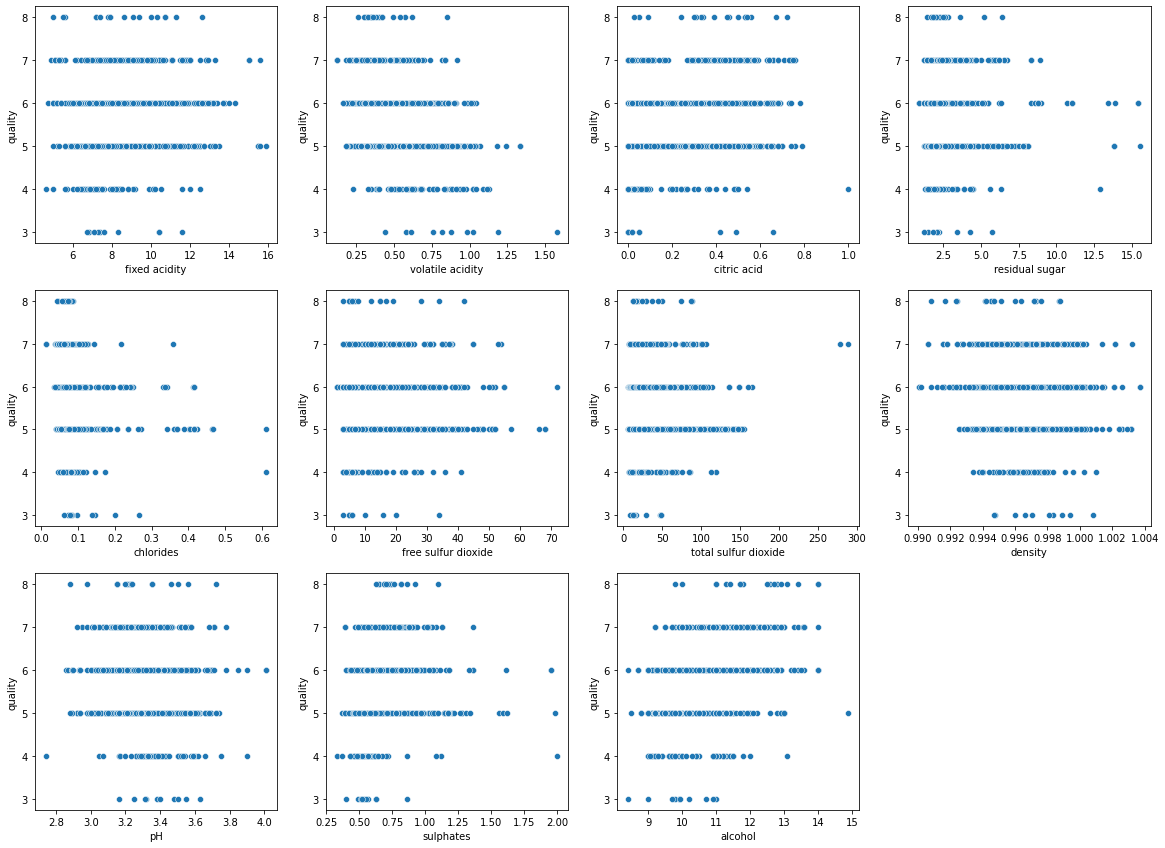

In [14]:
plotting(data, FEATURES, LABEL)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DistPlot

In [16]:
def distplot(df, FEATURES):
  plt.figure(figsize =(20,20))
  for loc, FEATURES in enumerate(FEATURES):
    ax = plt.subplot(4, 4, loc+1)
    sns.histplot(df[FEATURES], bins=100)
  plt.show()
  plt.close()
  return None


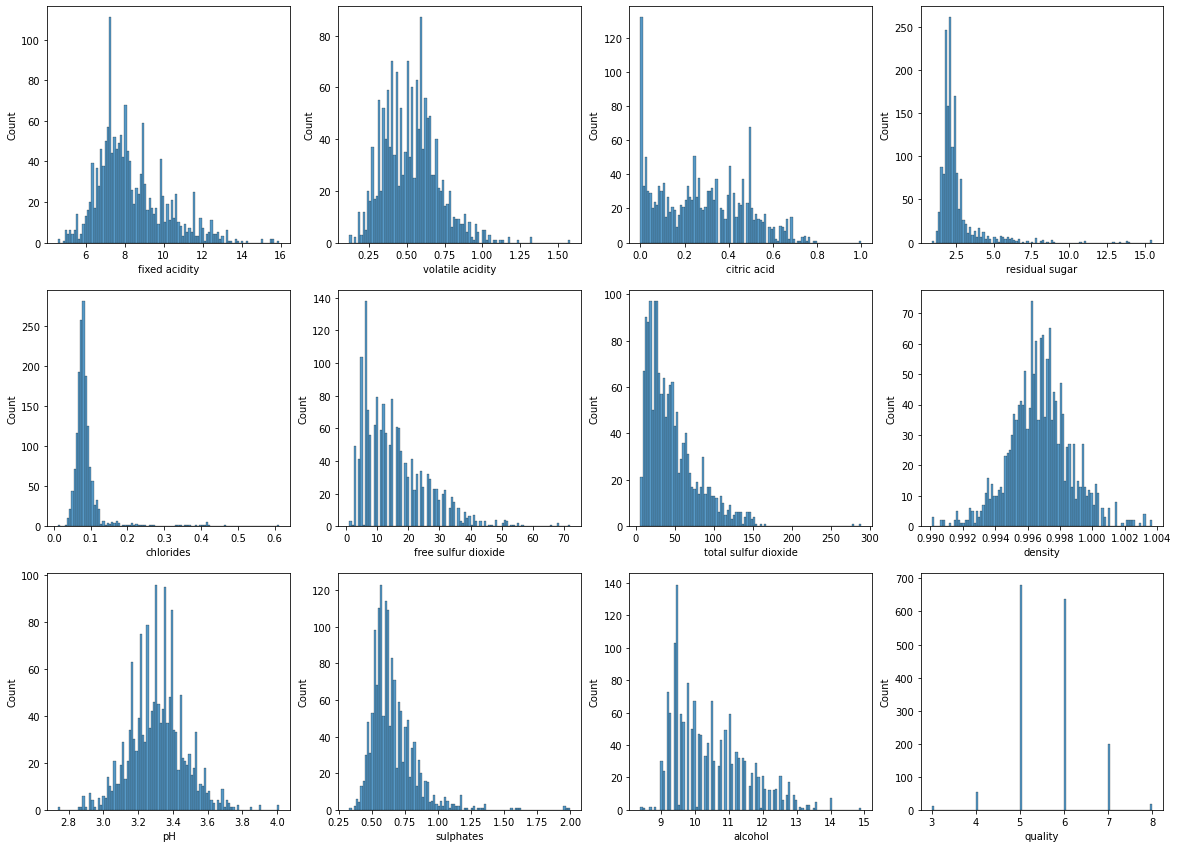

In [17]:
distplot(data, data.columns)

#Heat map

In [18]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


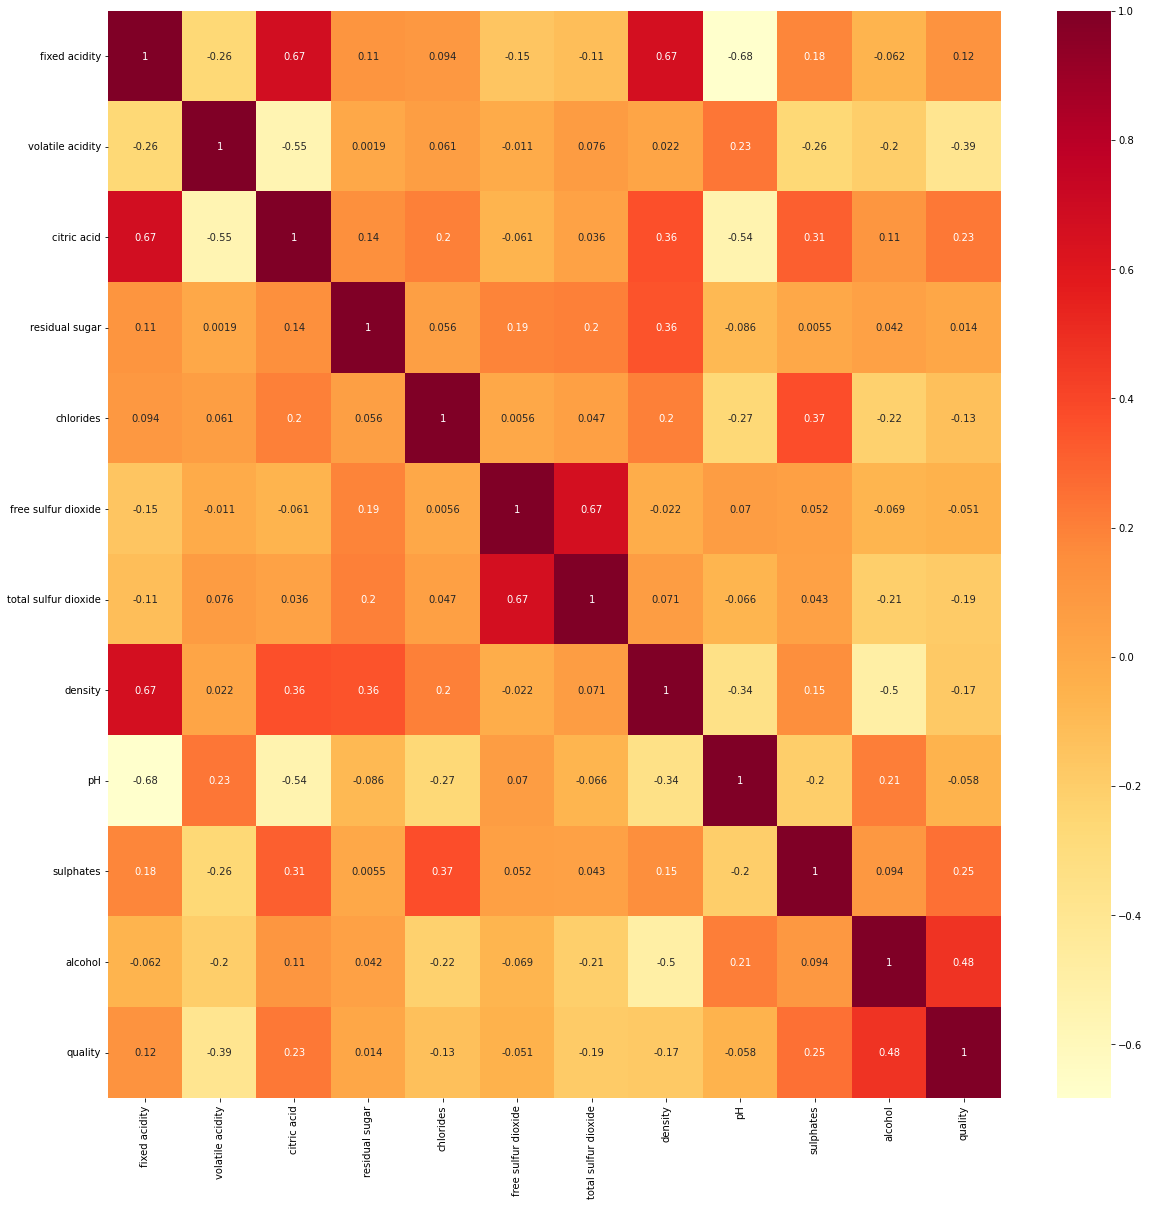

In [20]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()
plt.close()

#Train Test

In [21]:
features = data.drop(['quality'], axis =1)
target = data['quality']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=42)

for each in [X_train, X_test, Y_train, Y_test]:
  print(f"Shape: {each.shape}")

Shape: (1119, 11)
Shape: (480, 11)
Shape: (1119,)
Shape: (480,)


In [22]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.580,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [23]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1468,7.3,0.48,0.32,2.10,0.062,31.0,54.0,0.99728,3.30,0.65,10.0
495,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1325,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
514,10.5,0.51,0.64,2.40,0.107,6.0,15.0,0.99730,3.09,0.66,11.8


#Model Building

In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

print(f"Bias (c) : {linear_model.intercept_}\n")
print(f"Weights (m1, m2 ... mn) : \n {linear_model.coef_}")

Bias (c) : 17.962578339232415

Weights (m1, m2 ... mn) : 
 [ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]


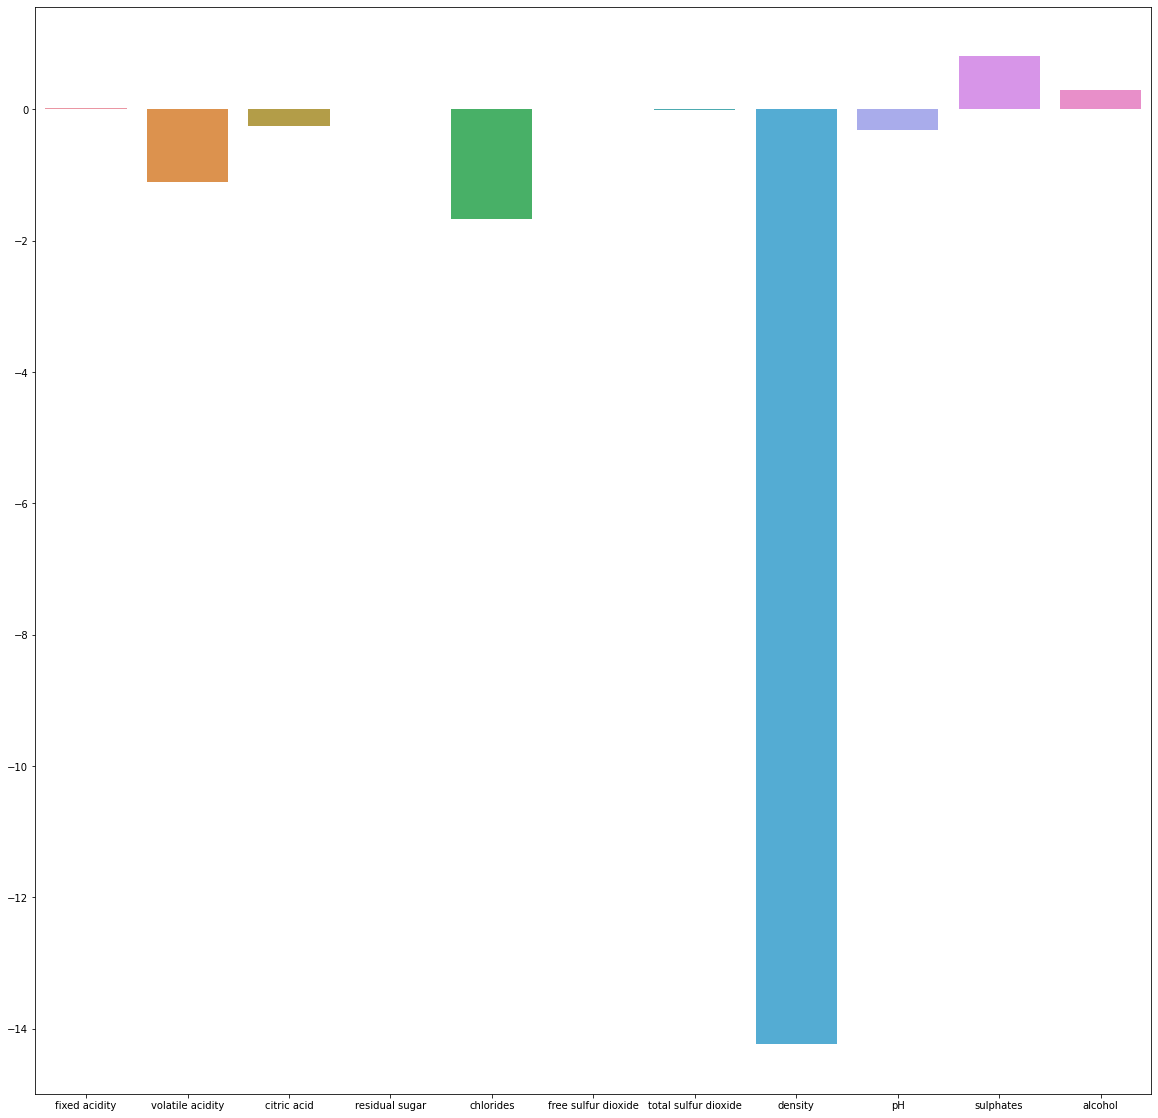

In [25]:
def plot_coefficients(model, X_train):
  plt.figure(figsize = (20,20))
  sns.barplot(x=X_train.columns, y=model.coef_)
  plt.show()
  return None

plot_coefficients(linear_model, X_train)

#RMSE

In [26]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

In [27]:
sqrt(mean_squared_error(Y_train, train_predictions))

0.6486806989670354

In [28]:
def rmse_calculation(actual_train, pred_train, actual_test, pred_test):
  return f"RMSE Train: {sqrt(mse(actual_train, pred_train)):.2f}\nRMSE Test: {sqrt(mse(actual_test, pred_test)):.2f}"

In [29]:
def score_calculation(model, X_train, X_test, y_train, y_test):
    return f"Train Score: {model.score(X_train, Y_train)*100:.2f}\nTest Score: {model.score(X_test, Y_test)*100:.2f}"

In [30]:
print(score_calculation(linear_model, X_train, X_test, Y_train, Y_test), sep='\n')
print('-' * 25)
print(rmse_calculation(Y_train, train_predictions, Y_test, test_predictions), sep='\n')

Train Score: 36.12
Test Score: 35.14
-------------------------
RMSE Train: 0.65
RMSE Test: 0.64


#Error Histogram/Displot

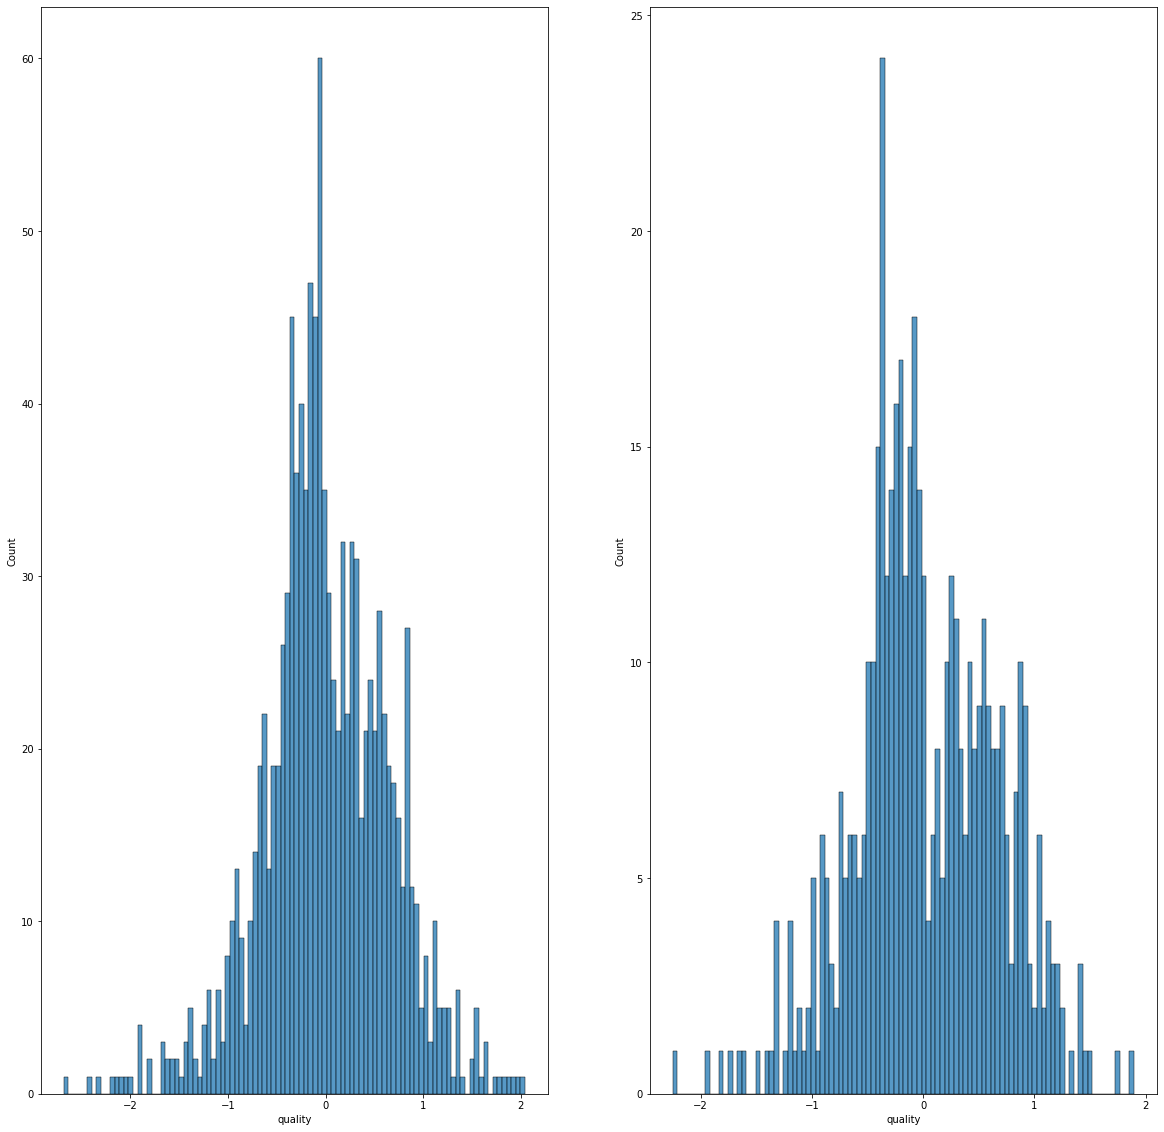

In [31]:
train_error = (Y_train - train_predictions)
test_error = (Y_test - test_predictions)

plt.figure(figsize=(20,20))
plt.subplot(121)
sns.histplot(train_error, bins =100)

plt.subplot(122)
sns.histplot(test_error, bins=100)
plt.show()
plt.close()


In [32]:
actual_vs_predicted_data = pd.DataFrame({'Actual MEDV': Y_test.values, 'Predicted MEDV': test_predictions})
display(actual_vs_predicted_data.head(10))

,Actual MEDV,Predicted MEDV
0,6,5.356763
1,5,5.090715
2,6,5.625538
3,5,5.448861
4,6,5.744784
5,5,5.280306
6,5,5.059092
7,5,5.132257
8,5,5.734199
9,6,5.714566


#Principal Component Analysis

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
transformed_X = pca.fit_transform(X_train)

In [35]:
W = pca.components_[:2]
W

array([[-5.50092614e-03,  3.66062436e-04,  2.53264919e-04,
         7.10264290e-03,  4.88136529e-05,  2.14032391e-01,
         9.76759229e-01,  3.60072276e-06, -3.11342559e-04,
         1.73817703e-04, -7.10695772e-03],
       [-2.35345429e-02, -2.18881558e-03, -3.31366463e-03,
         8.48666627e-03, -2.49271213e-04,  9.76393059e-01,
        -2.14043528e-01, -2.65372475e-05,  3.04751440e-03,
         8.23730134e-04,  1.37936502e-02]])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94856129, 0.9949876 , 0.99750402, 0.99907088, 0.99992501,
       0.999961  , 0.99998077, 0.99999032, 0.99999878, 1.        ,
       1.        ])

In [37]:
pca = PCA(n_components = 4)
transformed_X_train = pca.fit_transform(X_train)
transformed_X_test = pca.transform(X_test)

linear_model.fit(transformed_X_train, Y_train)
print(f"Bias (c) : {linear_model.intercept_}\n")
print(f"Weights (m1, m2, ... mn) : \n{linear_model.coef_}")

Bias (c) : 5.621983914209116

Weights (m1, m2, ... mn) : 
[-0.00472101  0.01240242  0.04095063  0.03592008]


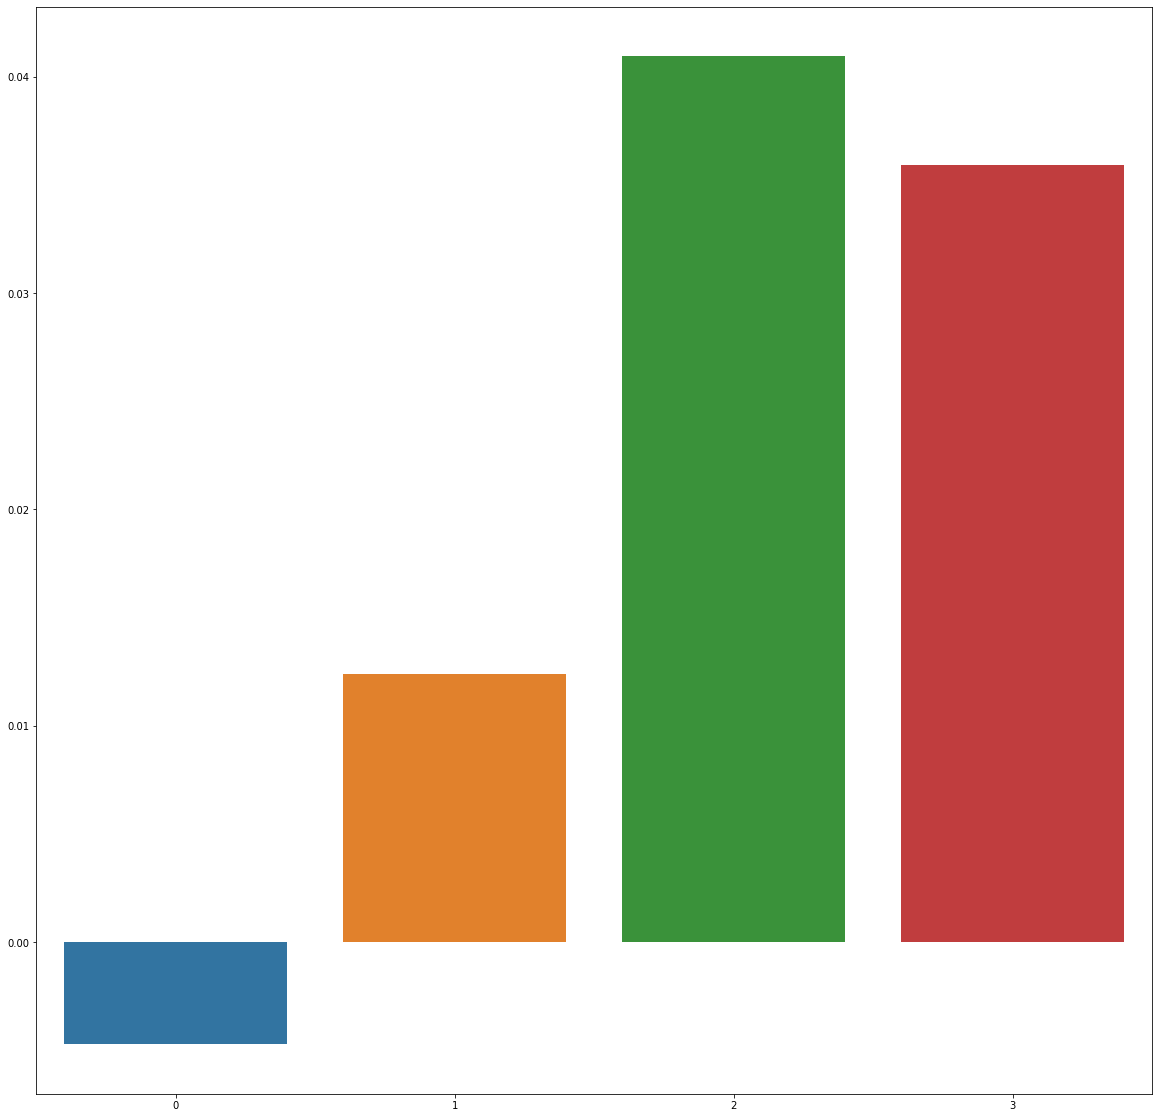

In [38]:
plot_coefficients(linear_model, pd.DataFrame(transformed_X_train))


In [39]:
train_predictions = linear_model.predict(transformed_X_train)
test_predictions = linear_model.predict(transformed_X_test)

print(score_calculation(linear_model, transformed_X_train, transformed_X_test, Y_train, Y_test), sep='\n')
print('-' * 25)
print(rmse_calculation(Y_train, train_predictions, Y_test, test_predictions), sep='\n')

Train Score: 6.30
Test Score: 4.93
-------------------------
RMSE Train: 0.79
RMSE Test: 0.78
